In [67]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [68]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
print('height =',height)
print('weight = ',weight)
print('gender =',gender)
print('x= ',x)
print('mwan-x =',mean_x)
print('std-x =',std_x)
print(y)
print(tx)

float64
height = [1.84617543 1.7195476  1.85275263 ... 1.59669981 1.72585608 1.54860615]
weight =  [109.81967768  73.68895452  96.58434842 ...  58.32779473  74.38901745
  51.59669261]
gender = [0 0 0 ... 1 1 1]
x=  [ 1.94406149  0.62753668  2.01244346 ... -0.64968792  0.69312469
 -1.14970831]
mwan-x = 1.6591889938705313
std-x = 0.09618339348893848
[109.81967768  73.68895452  96.58434842 ...  58.32779473  74.38901745
  51.59669261]
[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


<class 'numpy.ndarray'>
(10000, 2)
(10000,)


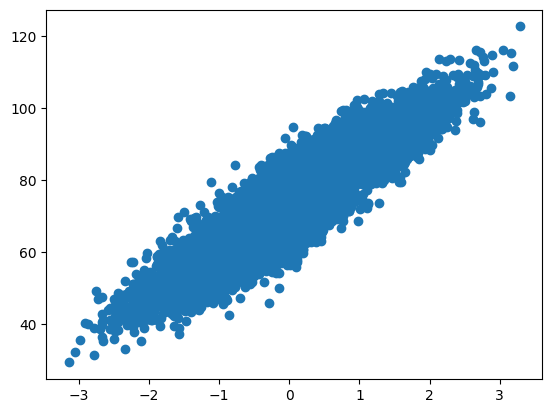

In [69]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: find shape of y and tx
# ***************************************************
print(type(y))
print(tx.shape)
print(y.shape)
plt.scatter(x,y)

# Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [70]:
def compute_loss(y, tx, w):
  e = y - tx.dot(w)
  e_mean = np.mean(e**2)
  mse = e_mean/2
  #print(e)
  #print(w)
  #print(e_mean)
  #print(num_data)
  #print(mse)
  return mse
    #"""Calculate the loss.
    #You can calculate the loss using mse or mae.
    #"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: return the mseloss
    # ***************************************************
    # raise NotImplementedError


In [71]:
def grid_search(y, tx, w0, w1):
    loss = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************

    for i in range(len(w0)):
        for j in range(len(w1)):
            w = (w0[i] , w1[j])
            loss[i,j] = compute_loss(y, tx, w)
    return loss

Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.162 seconds


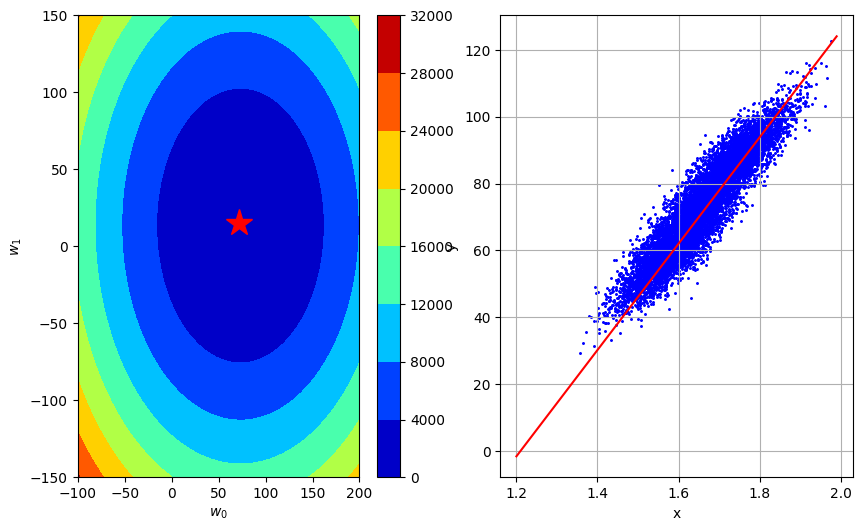

In [72]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Grid Search

Fill in the function `grid_search()` below:

In [73]:
#-----there is my code for two last fanction in one function-----



# from matplotlib.widgets import TextBox
# w1 = np.linspace(-150,150,301)
# w0 = np.linspace(-150,150,301)
# def grid_search(y, tx, w0, w1):
#     losses = np.zeros((len(w0), len(w1)))
#     # ***************************************************
# #     # INSERT YOUR CODE HERE
# #     # TODO: compute loss for each combination of w0 and w1.
# #     # ***************************************************

#     for i in range(len(w1)):
#         for j in range(len(w0)):
#             w = (w0[j] , w1[i])
#             losses[i,j] = compute_loss(y, tx, w)
#     min_loss = np.min(losses)
#     ij_min = np.unravel_index(losses.argmin(), losses.shape)
#     print('min-loss = ',min_loss)
#     print(ij_min)
#     print(w1[ij_min[0]] , w0[ij_min[1]])
#     w_min = [ w0[ij_min[1]] - mean_x*w1[ij_min[0]]/std_x , w1[ij_min[0]]/std_x]

#     plt.subplot(1,2,1)
#     x = np.linspace(-150, 150, 301)
#     y = np.linspace(-150, 150, 301)
#     z = losses
#     X, Y = np.meshgrid(x, y)
#     Z = z.reshape(301, 301)
#     plt.contourf(X, Y, Z, 10 , colors = ['darkblue','b','teal','aqua', 'goldenrod','gold','yellow','orange','red','orangered'])
#     plt.colorbar()
#     plt.xlabel('w0')
#     plt.ylabel('w1')

#     plt.subplot(1,2,2)

#     plt.scatter(height, weight)
#     plt.plot(height, w_min[0] + w_min[1]*height , color='r')
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.tight_layout()
#     print('heght == ',height)

#     plt.show()

#     return losses
#     raise NotImplementedError
# grid_search(y, tx, w0, w1)




Let us play with the grid search demo now!

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [74]:
def compute_gradient(y, tx, w):

    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    print(tx,err)
    return grad, err



Please fill in the functions `gradient_descent` below:

In [75]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient , err = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma * gradient
        ws.append(w)
        losses.append(loss)

        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws


Test your gradient descent function through gradient descent demo shown below:

In [76]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]] [109.81967768  73.68895452  96.58434842 ...  58.32779473  74.38901745
  51.59669261]
Gradient Descent(0/49): loss=2792.2367127591674, w0=51.30574540147369, w1=9.435798704492312
[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]] [40.17015936 16.46189935 26.28959165 ... 13.15237373 16.54308704
 11.13936341]
Gradient Descent(1/49): loss=265.30246210895854, w0=66.69746902191572, w1=12.266538315840002
[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]] [19.27530387 -0.70621721  5.20116462 ... -0.40025257 -0.81069209
 -0.99783536]
Gradient Descent(2/49): loss=37.87837955044118, w0=71.31498610804834

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

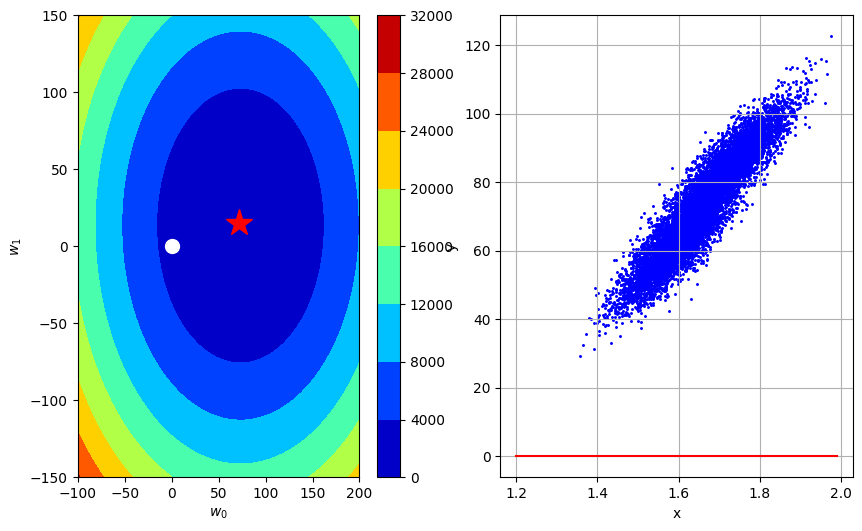

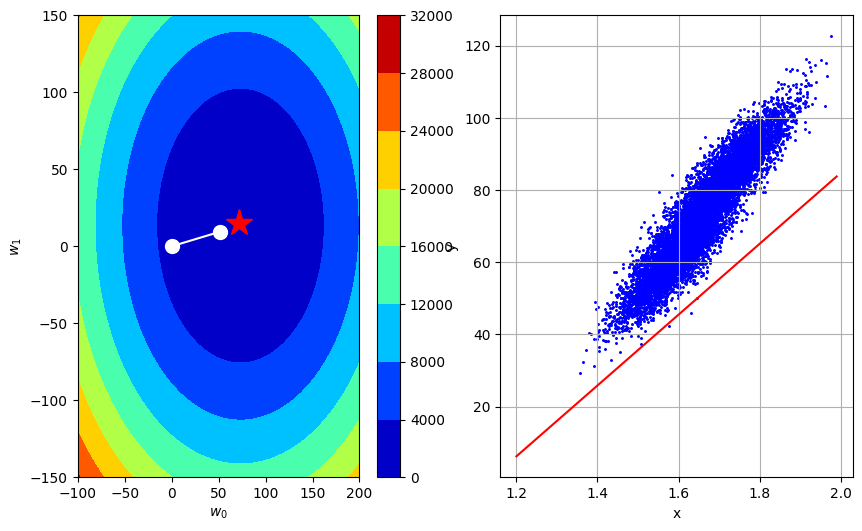

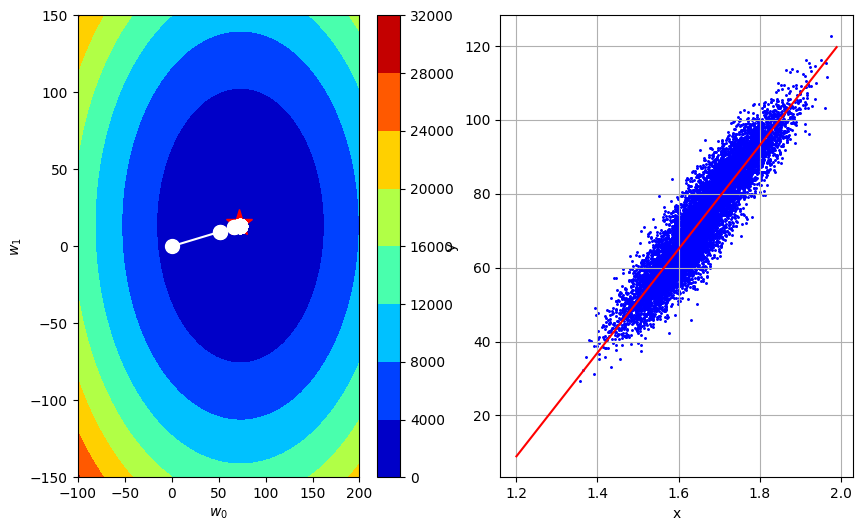

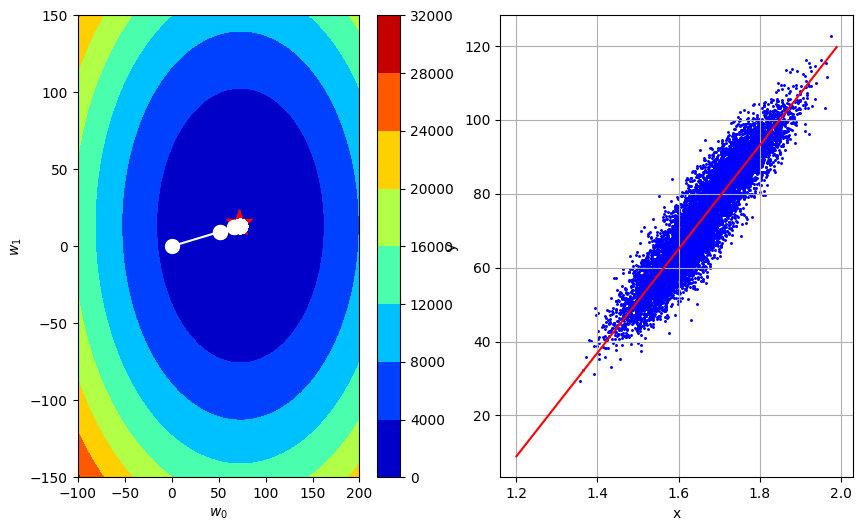

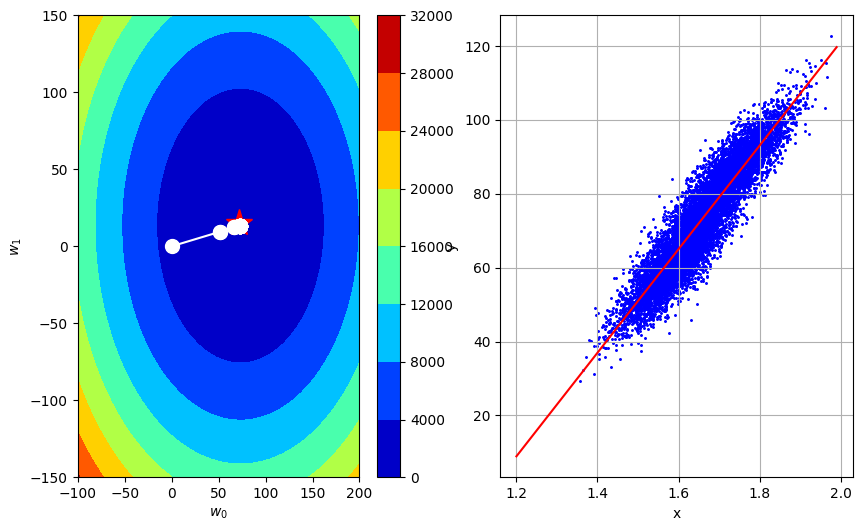

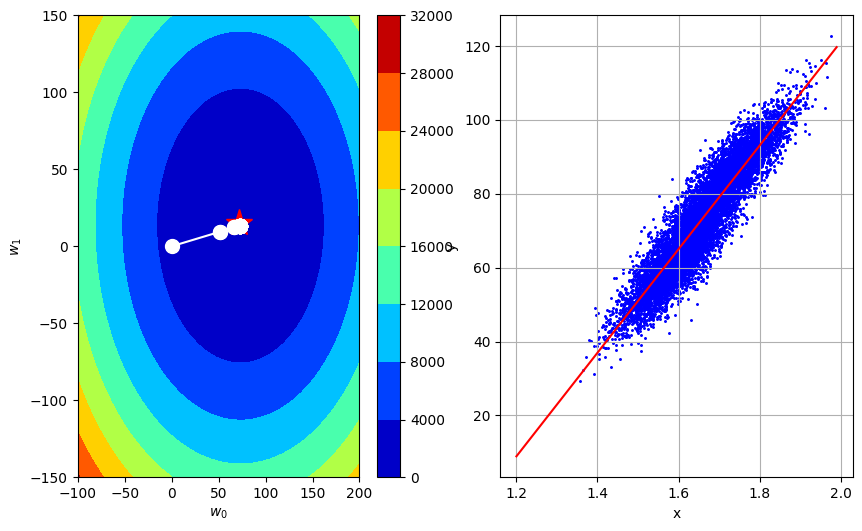

In [77]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))